# Example 3: Galaxy-galaxy lensing 

In this example, we'll show how to calculate $\Delta\Sigma(r),$ the galaxy-galaxy lensing signal of a mock catalog.  

In [1]:
#from halotools.empirical_models import PrebuiltSubhaloModelFactory
#model = PrebuiltSubhaloModelFactory('behroozi10')

from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='chinchilla', redshift=0.2, halo_finder='rockstar', version_name = 'Lb400-2048',\
                           dz_tol = 0.01, ptcl_version_name = 'Lb400-2048')
#model.populate_mock(halocat)

In [2]:
import numpy as np
galaxy_magnitudes = np.genfromtxt('gama_matched_catalog.npy')
downsample_idxs = np.genfromtxt('gama_matched_catalog_idxs.npy')

In [3]:
downsample_idxs = downsample_idxs.astype(int)

In [4]:
#do the downsampling 
galaxy_magnitudes = galaxy_magnitudes[downsample_idxs]

In [5]:
len(galaxy_magnitudes)/(400.0**3)

0.00077715625

Predictions for galaxy-galaxy lensing are calculated from the cross-correlation between the galaxy positions and the dark matter density field. For the latter, we will use the dark patter particle positions stored in the `ptcl_table` attribute of the mock.

In [6]:
px = halocat.ptcl_table['x']
py = halocat.ptcl_table['y']
pz = halocat.ptcl_table['z']

from halotools.mock_observables import return_xyz_formatted_array

Nptcls_to_keep = int(5e4)
randomizer = np.random.random(len(halocat.ptcl_table))
sorted_randoms = np.sort(randomizer)
ptcl_mask = np.where(sorted_randoms < sorted_randoms[Nptcls_to_keep])[0]
particle_positions = return_xyz_formatted_array(px, py, pz, mask = ptcl_mask)

Now we will extract the *x, y, z* positions of various subsamples of our galaxies 

In [7]:
#take them from our SHAM, not the mock
magnitude_cut = galaxy_magnitudes < -19

x = halocat.halo_table['halo_x'][downsample_idxs][magnitude_cut]
y = halocat.halo_table['halo_y'][downsample_idxs][magnitude_cut]
z = halocat.halo_table['halo_z'][downsample_idxs][magnitude_cut]

In [8]:
all_positions = return_xyz_formatted_array(x,y,z)

In [9]:
from halotools.mock_observables import delta_sigma

rp_bins = np.logspace(-1,1,15)

particle_masses = halocat.particle_mass
period=halocat.Lbox[0]
#downsampling_factor = (halocat.num_ptcl_per_dim**3)/float(len(particle_positions))
downsampling_factor = Nptcls_to_keep

In [10]:
from astropy import cosmology
cosmo =  cosmology.core.LambdaCDM(H0=100 * 0.7, Om0=0.286, Ode0=0.714)

In [11]:
rp, result_all_in_mpc = delta_sigma(all_positions, particle_positions, 
                                     particle_masses, downsampling_factor,
                                    rp_bins, period, cosmology= cosmo, num_threads='max')

In [12]:
length_unit_conversion = 1e6
result_all_in_pc = result_all_in_mpc/length_unit_conversion**2

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

(array([  1.00000000e-02,   1.00000000e-01,   1.00000000e+00,
          1.00000000e+01,   1.00000000e+02,   1.00000000e+03,
          1.00000000e+04]), <a list of 7 Text yticklabel objects>)

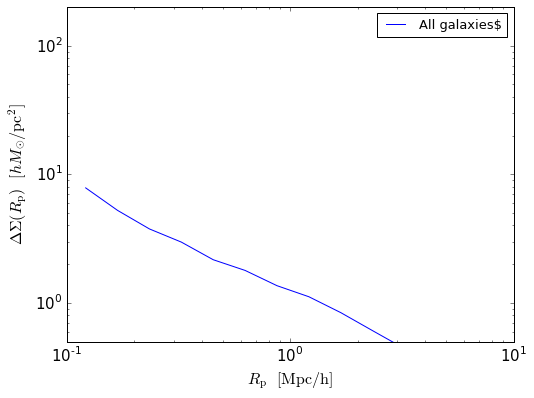

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

__=plt.loglog()

__=ax.plot(rp, result_all_in_pc, label=r'All galaxies$')

__=ax.set_xlim(xmin = 0.1, xmax = 10)
__=ax.set_ylim(ymin = 0.5, ymax = 200)

__=ax.set_xlabel(r'$R_{\rm p} $  $\rm{[Mpc / h]}$', fontsize=16)
__=ax.set_ylabel(r'$\Delta\Sigma(R_{\rm p})$  $[h M_{\odot} / {\rm pc}^2]$', fontsize=16)
__=ax.legend(loc='best', fontsize=13)
__=plt.xticks(fontsize=15); plt.yticks(fontsize=15) 
